In [4]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('happydata.csv')
df.head(10)

,infoavail,housecost,schoolquality,policetrust,streetquality,ëvents,happy
0,3,3,3,4,2,4,0
1,3,2,3,5,4,3,0
2,5,3,3,3,3,5,1
3,5,4,3,3,3,5,0
4,5,4,3,3,3,5,0
5,5,5,3,5,5,5,1
6,3,1,2,2,1,3,0
7,5,4,4,4,4,5,1
8,4,1,4,4,4,4,0
9,4,4,4,2,5,5,0


# Creating a copy

In [6]:
data = df.copy()

# Renaming the column

In [7]:
df.rename(columns={'ëvents':'events'}, inplace=True)

# Description of the dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   infoavail      143 non-null    int64
 1   housecost      143 non-null    int64
 2   schoolquality  143 non-null    int64
 3   policetrust    143 non-null    int64
 4   streetquality  143 non-null    int64
 5   events         143 non-null    int64
 6   happy          143 non-null    int64
dtypes: int64(7)
memory usage: 7.9 KB


In [9]:
df.describe()

,infoavail,housecost,schoolquality,policetrust,streetquality,events,happy
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,4.314685,2.538462,3.265734,3.699301,3.615385,4.216783,0.538462
std,0.799820,1.118155,0.992586,0.888383,1.131639,0.848693,0.500271
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000,0.000000
50%,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000,1.000000
75%,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


In [10]:
df.columns

Index(['infoavail', 'housecost', 'schoolquality', 'policetrust',
       'streetquality', 'events', 'happy'],
      dtype='object')

In [11]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 143
Number of columns: 7


# Missing null values

In [12]:
df.isnull().sum()

infoavail        0
housecost        0
schoolquality    0
policetrust      0
streetquality    0
events           0
happy            0
dtype: int64

# Check duplicate values

In [13]:
df.duplicated().sum()

18

# Dropping Duplicates

In [14]:
df.drop_duplicates()

,infoavail,housecost,schoolquality,policetrust,streetquality,events,happy
0,3,3,3,4,2,4,0
1,3,2,3,5,4,3,0
2,5,3,3,3,3,5,1
3,5,4,3,3,3,5,0
5,5,5,3,5,5,5,1
...,...,...,...,...,...,...,...
137,5,2,3,4,4,3,1
138,5,3,3,1,3,5,0
139,5,2,3,4,2,5,1
141,4,3,3,4,4,5,0


# Analysis the data

<AxesSubplot:xlabel='happy'>

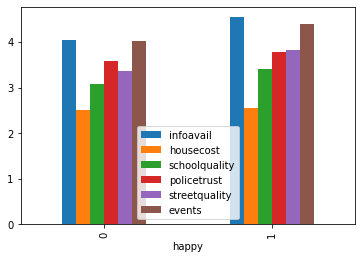

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

df.groupby('happy').mean().plot(kind='bar')

In [16]:
def plotter(col_name: str, target_name: str, ax):
    sns.countplot(x=col_name, data=df, hue=target_name,ax=ax)
    ax.set_title(f"{col_name.upper()} DISTRIBUTION")
    for container in ax.containers:
        ax.bar_label(container)

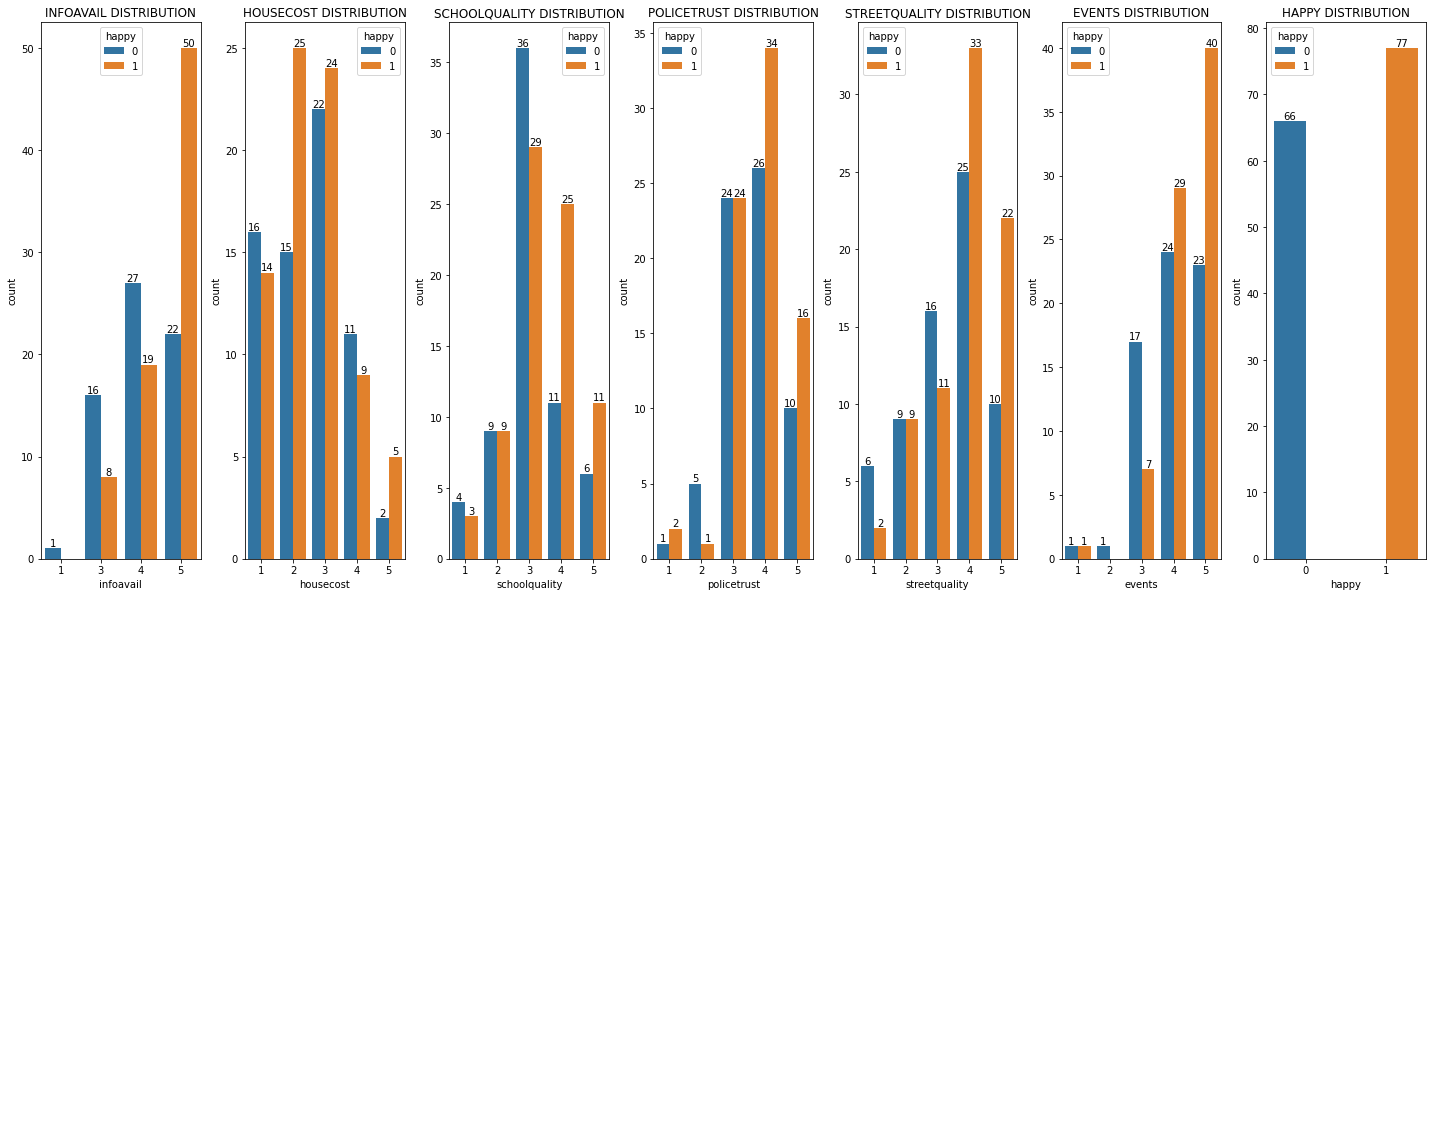

In [17]:
cols= df.columns
count_cols = len(cols)
fig, axes = plt.subplots(nrows=2, ncols=count_cols, figsize=(20, 16))

# Calculating the row and column for plotting the graph on respected subplots
for i,col in enumerate(cols):
    row_index = i // count_cols
    col_index = i % count_cols
    ax = axes[row_index, col_index]
    plotter(col, 'happy', ax)

# Removing the Unnecessary subplots
for i in range(count_cols * 2 - len(cols)):
    row_index = (i + len(cols)) // count_cols
    col_index = (i + len(cols)) % count_cols
    ax = axes[row_index, col_index]
    ax.axis('off')

plt.tight_layout()
plt.show()

# Outliers



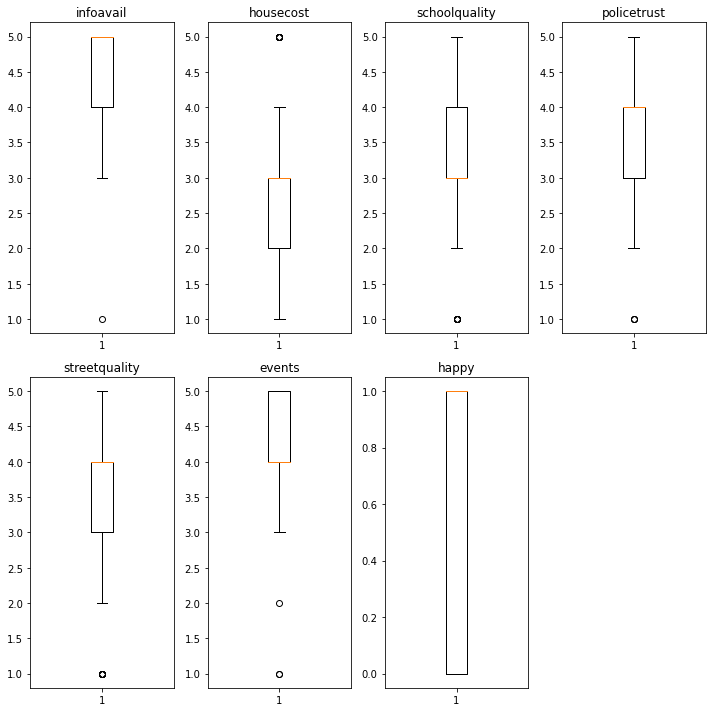

In [18]:
# Creating subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 10))
# Flatten the axes array to iterate over subplots
axes = axes.flatten()

categorical_cols = df.columns[df.dtypes == object]
numberic_cols = [x for x in df.columns if x not in categorical_cols]
# Plot boxplots for each column
for i, column in enumerate(numberic_cols):
    axes[i].boxplot(df[column])
    axes[i].set_title(column)

# Hide any unused subplots
for j in range(len(numberic_cols), len(axes)):
    axes[j].axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

# CORRELATION

<AxesSubplot:>

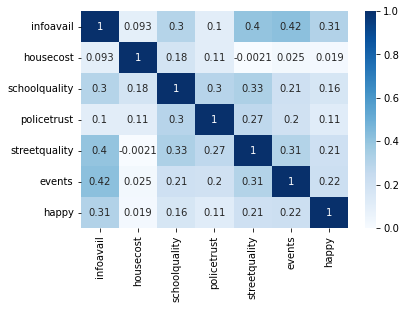

In [19]:
sns.heatmap(df.corr(), annot=True, cmap='Blues')

In [20]:
cor = df.corr()['happy'].sort_values(ascending=True)
cor

housecost        0.019368
policetrust      0.113356
schoolquality    0.163639
streetquality    0.206685
events           0.220729
infoavail        0.312740
happy            1.000000
Name: happy, dtype: float64

**The correlation graph shows that every variable except housecost have a strong relation with the target column happy.**

In [21]:
df = df.drop(['housecost'], axis=1)

In [22]:
df.describe()

,infoavail,schoolquality,policetrust,streetquality,events,happy
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,4.314685,3.265734,3.699301,3.615385,4.216783,0.538462
std,0.799820,0.992586,0.888383,1.131639,0.848693,0.500271
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,3.000000,3.000000,3.000000,4.000000,0.000000
50%,5.000000,3.000000,4.000000,4.000000,4.000000,1.000000
75%,5.000000,4.000000,4.000000,4.000000,5.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


In [23]:
from sklearn.model_selection import train_test_split
X = df.drop(columns= 'happy', axis =1)
Y = df['happy']

X_train, X_test, Y_train,Y_test = train_test_split(X, Y, stratify=Y, test_size = 0.1, random_state = 42)

In [24]:
print(X_train.shape, X_test.shape)

(128, 5) (15, 5)


In [25]:
print(Y_train.shape, Y_test.shape)

(128,) (15,)


# Scaling the values

In [26]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler

In [27]:
# X_trian = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# KNN Classifier

In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors= 4)
knn

KNeighborsClassifier(n_neighbors=4)

In [29]:
knn = knn.fit(X_train, Y_train)
Y_test_pred = knn.predict(X_test)
Y_train_pred = knn.predict(X_train)

# Model Evaluation

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred),
                      'recall': recall_score(y_true, y_pred),
                      'f1': f1_score(y_true, y_pred)},
                      name=label)

In [31]:
error_report = pd.concat([measure_error(Y_train, Y_train_pred, 'train'), measure_error(Y_test, Y_test_pred, 'test')], axis=1)
error_report

,train,test
accuracy,0.734375,0.733333
precision,0.807018,1.000000
recall,0.666667,0.500000
f1,0.730159,0.666667


In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score

print(classification_report(Y_test, Y_test_pred))
print('Accuracy score: ', round(accuracy_score(Y_test, Y_test_pred), 2))
print('F1 Score: ', round(f1_score(Y_test, Y_test_pred), 2))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78         7
           1       1.00      0.50      0.67         8

    accuracy                           0.73        15
   macro avg       0.82      0.75      0.72        15
weighted avg       0.83      0.73      0.72        15

Accuracy score:  0.73
F1 Score:  0.67


# Plot confusion matrix

Text(0.5, 42.0, 'Ground Truth')

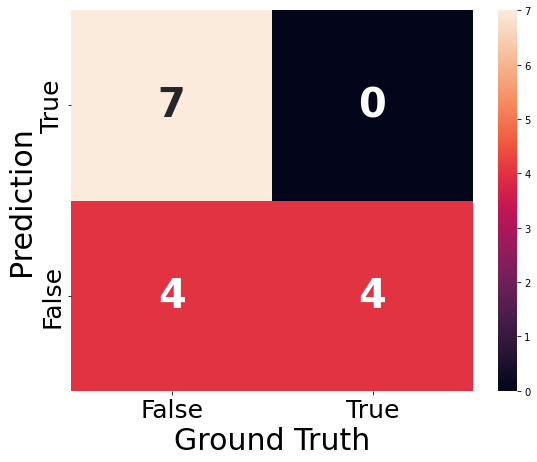

In [33]:
_, ax = plt.subplots(figsize=(9, 7))
ax = sns.heatmap(confusion_matrix(Y_test, Y_test_pred), annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"})  
labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels[::-1], fontsize=25);
ax.set_ylabel('Prediction', fontsize=30);
ax.set_xlabel('Ground Truth', fontsize=30)

# KNN Classifier with GridSearchCV

In [34]:

from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_neighbors': np.arange(1,29),
    'metric': ['euclidean', 'manhattan'],
             }
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, cv=10)
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])})

In [35]:
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 12}


In [36]:
best_knn = grid_search.best_estimator_
best_knn

KNeighborsClassifier(metric='manhattan', n_neighbors=12)

In [37]:
Y_test_pred = best_knn.predict(X_test)
Y_train_pred = best_knn.predict(X_train)

# Model Evaluation

In [38]:
GR_error_report = pd.concat([measure_error(Y_train, Y_train_pred, 'train'), measure_error(Y_test, Y_test_pred, 'test')], axis=1)
GR_error_report

,train,test
accuracy,0.656250,0.666667
precision,0.671233,0.636364
recall,0.710145,0.875000
f1,0.690141,0.736842


In [39]:
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

           0       0.75      0.43      0.55         7
           1       0.64      0.88      0.74         8

    accuracy                           0.67        15
   macro avg       0.69      0.65      0.64        15
weighted avg       0.69      0.67      0.65        15



Text(0.5, 42.0, 'Ground Truth')

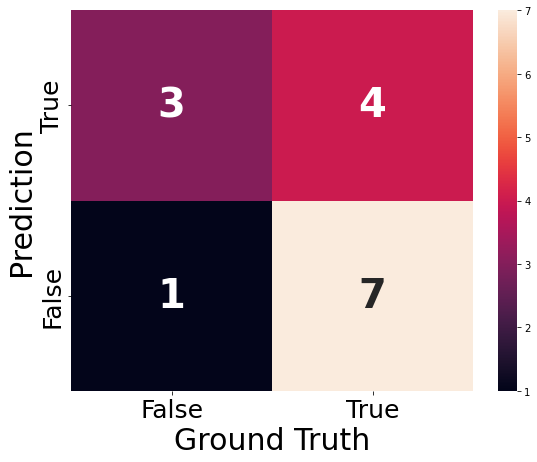

In [40]:
_, ax = plt.subplots(figsize=(9, 7))
ax = sns.heatmap(confusion_matrix(Y_test, Y_test_pred), annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"})  
labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels[::-1], fontsize=25);
ax.set_ylabel('Prediction', fontsize=30);
ax.set_xlabel('Ground Truth', fontsize=30)